In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np

%matplotlib inline

# Create own dataset
## Data: Customer counts per date

In [2]:
np.seed(111)

In [4]:
def CreateDataSet(Number=1):
    Output = []
    
    for i in range(Number):
        #Create a list with Weekly Dates. See: W-MON
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        data = np.randint(low=25, high=1000, size=len(rng))
        
        status = [1, 2, 3]
        
        random_status = [status[np.randint(low=0, high=len(status))] for i in range(len(rng))]
        
        states = ['GA', 'FL', 'fl', 'NY', 'NJ', 'TX']
        
        random_states = [states[np.randint(low=0, high=len(states))] for i in range(len(rng))]
        
        dataset = zip(random_states, random_status, data, rng)
        
        Output.extend(dataset)
    
    return Output

In [11]:
dataset = CreateDataSet(4)

In [12]:
df = pd.DataFrame(dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [14]:
df.head()

,State,Status,CustomerCount,StatusDate
0,NY,1,681,2009-01-05
1,TX,2,147,2009-01-12
2,NY,3,110,2009-01-19
3,GA,1,301,2009-01-26
4,FL,1,261,2009-02-02


## Save to Excel

In [15]:
df.to_excel('Lesson3.xlsx', index=False)

## Get data from Excel

In [18]:
df = pd.read_excel('Lesson3.xlsx', index_col='StatusDate')

In [19]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,NY,1,681
2009-01-12,TX,2,147
2009-01-19,NY,3,110
2009-01-26,GA,1,301
2009-02-02,FL,1,261


In [21]:
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [22]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=836, freq=None)

# Cleanup data and prepare for analysis

In [23]:
df['State'].unique()

array([u'NY', u'TX', u'GA', u'FL', u'NJ', u'fl'], dtype=object)

## Clean State Column

### Convert all states to uppercase

In [25]:
df['State'] = df.State.apply(lambda x: x.upper())

In [26]:
df['State'].unique()

array([u'NY', u'TX', u'GA', u'FL', u'NJ'], dtype=object)

### Change NJ to NY

In [34]:
mask = df['State'] == 'NJ'

# df['State'][mask] = 'NY' is avoided. TODO: Why?
df.loc[mask, 'State'] = 'NY'

In [35]:
df.State.unique()

array([u'NY', u'TX', u'GA', u'FL'], dtype=object)

## Plot the customer count on graph

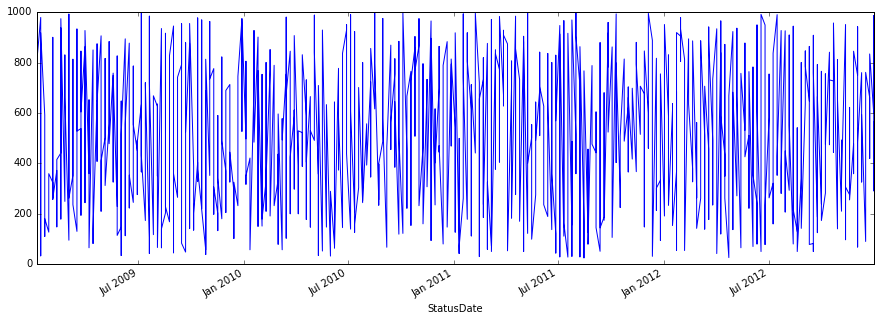

In [43]:
df['CustomerCount'].plot(figsize=(15,5))

## Grouping of data

In [93]:
# Reindex and bring StatusDate back to column instead of index
Daily = df.reset_index()

# Group all the customers according to state and the date
Daily = Daily.groupby(['State','StatusDate']).sum()

In [94]:
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-05       5           1305
      2009-01-12       6            951
      2009-01-26       2            429
      2009-02-02       2            518
      2009-02-16       3            179

In [97]:
# Remove the Status column as we do not need it
del Daily['Status']

In [112]:
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-05           1305
      2009-01-12            951
      2009-01-26            429
      2009-02-02            518
      2009-02-16            179

In [163]:
# Gives the insights to the how many level are there: 2 (State and Date)
# Daily.index

In [132]:
States = Daily.index.levels[0]
States

Index([u'FL', u'GA', u'NY', u'TX'], dtype='object', name=u'State')

In [124]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=209, freq=None)

In [136]:
CreatePlotStateWise = lambda state: Daily.loc[state].plot(figsize=(15,5))

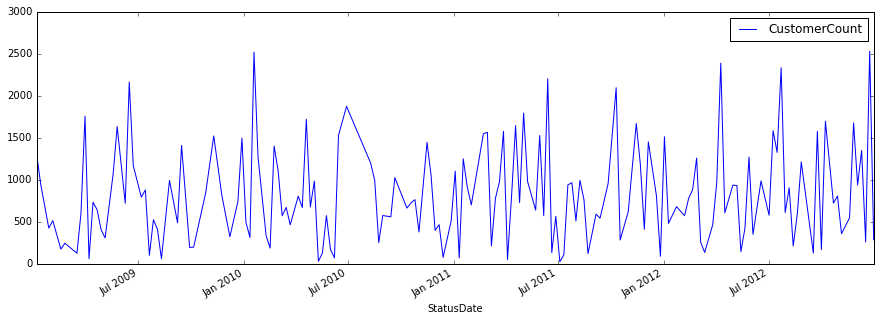

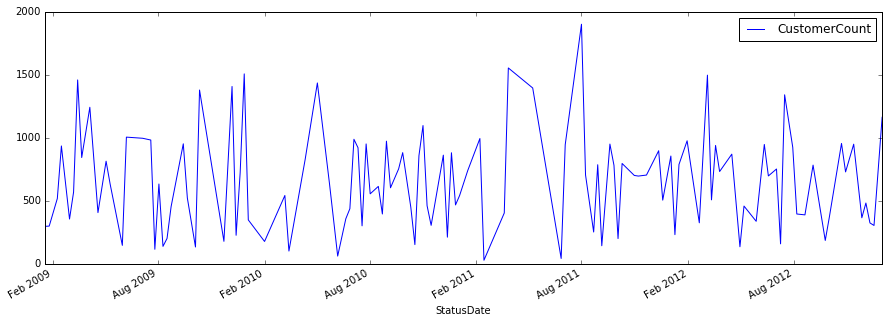

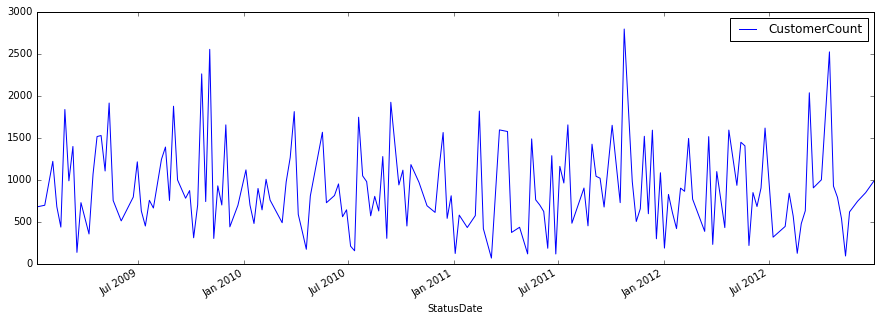

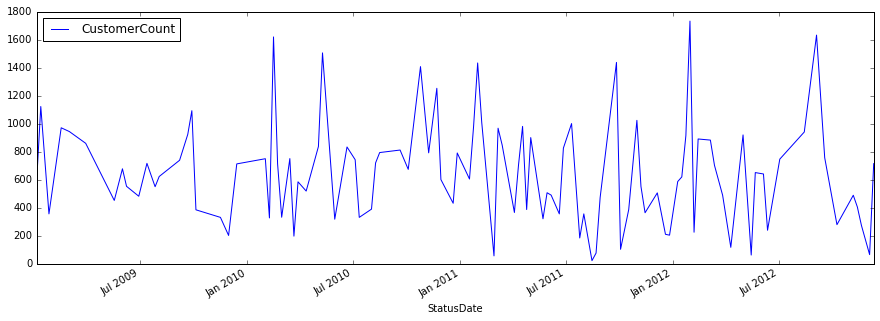

In [137]:
for state in States:
    CreatePlotStateWise(state)

## Group data by State, Year and Month

In [154]:
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0),
                                Daily.index.get_level_values(1).year,
                                Daily.index.get_level_values(1).month])

In [164]:
StateYearMonth.head()

CustomerCount
State StatusDate               
FL    2009-01-05           1305
      2009-01-12            951
      2009-01-26            429
      2009-02-02            518
      2009-02-16            179
      2009-02-23            249
      2009-03-16            130
      2009-03-23            604
      2009-03-30           1761
      2009-04-06             65
      2009-04-13            737
      2009-04-20            649
      2009-04-27            410
      2009-05-04            312
      2009-05-18           1075
      2009-05-25           1638
      2009-06-08            725
      2009-06-15           2168
      2009-06-22           1172
      2009-07-06            798
      2009-07-13            883
      2009-07-20            105
      2009-07-27            528
      2009-08-03            416
      2009-08-10             65
      2009-08-24            996
      2009-09-07            492
      2009-09-14           1413
      2009-09-28            199
      2009-10-05            202
...                         ...
TX    2011-11-07            554
      2011-11-14            367
      2011-12-05            509
      2011-12-19            213
      2011-12-26            207
      2012-01-09            590
      2012-01-16            623
      2012-01-23            919
      2012-01-30           1736
      2012-02-06            228
      2012-02-13            894
      2012-03-05            886
      2012-03-12            706
      2012-03-26            492
      2012-04-09            120
      2012-04-30            923
      2012-05-14             65
      2012-05-21            654
      2012-06-04            644
      2012-06-11            242
      2012-07-02            750
      2012-08-13            944
      2012-09-03           1636
      2012-09-17            760
      2012-10-08            282
      2012-11-05            492
      2012-11-12            408
      2012-11-19            276
      2012-12-03             68
      2012-12-10            718

[548 rows x 1 columns]

In [167]:
type(StateYearMonth)

pandas.core.groupby.DataFrameGroupBy

In [198]:
rand_list = [1,10,100,100]

In [199]:
df_x = pd.DataFrame(rand_list)

In [209]:
print df_x.quantile(.25)
print df_x.quantile(.5)
print df_x.quantile(.75)

0    7.75
dtype: float64
0    55.0
dtype: float64
0    100.0
dtype: float64
